# cvPCA Analysis - Layers

## Import modules

In [1]:
from itertools import permutations
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

## cvPCA Helper Functions

These functions will allow us to run a complete PCA analysis

In [2]:
def get_sample_cov_matrix(X):
    

    mean_vec = np.mean(X, axis=0)

    X_standard = (X - mean_vec)/np.std(X,axis = 0)

    cov_matrix = X_standard.T.dot(X_standard)/(X_standard.shape[0]-1)

    return cov_matrix

In [3]:
#This function sorts the eigenvalues into descending order so that it is possible to see the amount of variance explained by each principle component
def sort_evals_descending(evals, evectors):
    index = np.flip(np.argsort(evals))
    evals = evals[index]
    evectors = evectors[:, index]
    if evals.shape[0] == 2:
        if np.arccos(np.matmul(evectors[:, 0], 1 / np.sqrt(2) * np.array([1, 1]))) > np.pi / 2:
            evectors[:, 0] = -evectors[:, 0]
        if np.arccos(np.matmul(evectors[:, 1], 1 / np.sqrt(2) * np.array([-1, 1]))) > np.pi / 2:
            evectors[:, 1] = -evectors[:, 1]
    return evals, evectors

In [4]:
def pca(X):
    
    X = X[::2]
  # Calculate the sample covariance matrix

    cov_matrix = get_sample_cov_matrix(X)

  # Calculate the eigenvalues and eigenvectors
    evals, evectors = np.linalg.eigh(cov_matrix)

  # Sort the eigenvalues in descending order
    evals, evectors = sort_evals_descending(evals, evectors)

    return evectors, evals


In [5]:
def cvpca(X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,start = 0,end = 90):
    trial_perms = list(permutations(['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10'], 2))
    matrix_dict = {'X1':X1,'X2':X2,'X3':X3,'X4':X4,'X5':X5,'X6':X6,'X7':X7,'X8':X8,'X9':X9,'X10':X10}
    evalues_list = []
    for i in range(start,end):
        X_train = matrix_dict[trial_perms[i][0]]
        X_test = matrix_dict[trial_perms[i][1]]

        mean_vec_train = np.mean(X_train, axis=0)
        X_train_standard = (X_train - mean_vec_train)/np.std(X_train,axis = 0)

        X_test_standard = (X_test - mean_vec_train)/np.std(X_train,axis = 0)

        evalues_train, evectors_train = np.linalg.eigh(X_train_standard.T.dot(X_train_standard)/(X_train_standard.shape[0]-1))
        evalues_train, evectors_train = sort_evals_descending(evalues_train, evectors_train)

        evalues_cvpca = np.diag(np.dot(np.dot(evectors_train.T, np.dot(X_test_standard.T, X_train_standard)), evectors_train)/(X_train_standard.shape[0]-1))
        evalues_list.append(evalues_cvpca)

        
    return evalues_list

In [6]:
#This function plots the eigenspectrum (descending order of eigenvalues) of the layer resulting in a downward sloping graph
#Represented with a log-log scale
def plot_eigenspectrum(evals):
    x=np.linspace(1,400,400)
    y=f(x)
    plt.plot(x, y,color = 'black', label = '1/n Decay')
    plt.plot(np.arange(1, len(evals) + 1), evals/np.sum(evals), label = 'cvPCA Test')
    plt.xlabel('PC Components')
    plt.ylabel('Variance')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(1,5000)
    plt.ylim(10e-5,1)
    plt.legend()
    plt.show()

In [113]:
#Normalized
def plot_eigenspectrum_combined_layers(evals_1,evals_23,evals_4,evals_5, evals_6):
    plt.figure()
    x=np.linspace(1,400,400)
    y=f(x)
    plt.plot(x, y,color = 'black', label = '1/n Decay')
    plt.plot(np.arange(1, len(evals_1) + 1), evals_1/np.sum(evals_1), label = 'Layer 1')
    plt.plot(np.arange(1, len(evals_23) + 1), evals_23/np.sum(evals_23), label = 'Layer 2/3')
    plt.plot(np.arange(1, len(evals_4) + 1), evals_4/np.sum(evals_4), label = 'Layer 4')
    plt.plot(np.arange(1, len(evals_5) + 1), evals_5/np.sum(evals_5), label = 'Layer 5')
    plt.plot(np.arange(1, len(evals_6) + 1), evals_6/np.sum(evals_6), label = 'Layer 6')
    plt.xlim(1,500)
    plt.ylim(10e-5,1)
    plt.xlabel('PC Components')
    plt.ylabel('Variance')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.show()

In [8]:
#Reference decay rate for graphs
def f(x):
    return 1/x

## Layer 1 Analysis

### Define data frames for each trial in layer 1

In [9]:
L1_Trial1_Oracle = pd.read_csv("C:/Users/riley/data/L1_Trial1_Oracle.csv", header= None)
L1_Trial1_Oracle = L1_Trial1_Oracle.to_numpy()
L1_Trial1_Oracle = np.transpose(L1_Trial1_Oracle)

In [10]:
L1_Trial2_Oracle = pd.read_csv("C:/Users/riley/data/L1_Trial2_Oracle.csv", header= None)
L1_Trial2_Oracle = L1_Trial2_Oracle.to_numpy()
L1_Trial2_Oracle = np.transpose(L1_Trial2_Oracle)

In [11]:
L1_Trial3_Oracle = pd.read_csv("C:/Users/riley/data/L1_Trial3_Oracle.csv", header= None)
L1_Trial3_Oracle = L1_Trial3_Oracle.to_numpy()
L1_Trial3_Oracle = np.transpose(L1_Trial3_Oracle)

In [12]:
L1_Trial4_Oracle = pd.read_csv("C:/Users/riley/data/L1_Trial4_Oracle.csv", header= None)
L1_Trial4_Oracle = L1_Trial4_Oracle.to_numpy()
L1_Trial4_Oracle = np.transpose(L1_Trial4_Oracle)

In [13]:
L1_Trial5_Oracle = pd.read_csv("C:/Users/riley/data/L1_Trial5_Oracle.csv", header= None)
L1_Trial5_Oracle = L1_Trial5_Oracle.to_numpy()
L1_Trial5_Oracle = np.transpose(L1_Trial5_Oracle)

In [14]:
L1_Trial6_Oracle = pd.read_csv("C:/Users/riley/data/L1_Trial6_Oracle.csv", header= None)
L1_Trial6_Oracle = L1_Trial6_Oracle.to_numpy()
L1_Trial6_Oracle = np.transpose(L1_Trial6_Oracle)

In [15]:
L1_Trial7_Oracle = pd.read_csv("C:/Users/riley/data/L1_Trial7_Oracle.csv", header= None)
L1_Trial7_Oracle = L1_Trial7_Oracle.to_numpy()
L1_Trial7_Oracle = np.transpose(L1_Trial7_Oracle)

In [16]:
L1_Trial8_Oracle = pd.read_csv("C:/Users/riley/data/L1_Trial8_Oracle.csv", header= None)
L1_Trial8_Oracle = L1_Trial8_Oracle.to_numpy()
L1_Trial8_Oracle = np.transpose(L1_Trial8_Oracle)

In [17]:
L1_Trial9_Oracle = pd.read_csv("C:/Users/riley/data/L1_Trial9_Oracle.csv", header= None)
L1_Trial9_Oracle = L1_Trial9_Oracle.to_numpy()
L1_Trial9_Oracle = np.transpose(L1_Trial9_Oracle)

In [18]:
L1_Trial10_Oracle = pd.read_csv("C:/Users/riley/data/L1_Trial10_Oracle.csv", header= None)
L1_Trial10_Oracle = L1_Trial10_Oracle.to_numpy()
L1_Trial10_Oracle = np.transpose(L1_Trial10_Oracle)

In [19]:
L1_AvgResp_Oracle = pd.read_csv("C:/Users/riley/data/L1_AvgResp_Oracle.csv", header= None)
L1_AvgResp_Oracle = L1_AvgResp_Oracle.to_numpy()
L1_AvgResp_Oracle = np.transpose(L1_AvgResp_Oracle)

### Run cvPCA function on Oracle stimuli

In [22]:
cvPCA_layer1_espectra = cvpca(L1_Trial1_Oracle,L1_Trial2_Oracle,L1_Trial3_Oracle,L1_Trial4_Oracle,L1_Trial5_Oracle,L1_Trial6_Oracle,L1_Trial7_Oracle,L1_Trial8_Oracle,L1_Trial9_Oracle,L1_Trial10_Oracle)
cvPCA_layer1_espectra = np.array(cvPCA_layer1_espectra)
cvPCA_layer1_espectrum = cvPCA_layer1_espectra.mean(axis=0)

In [92]:
np.savetxt('cvPCA_layer1_espectrum', cvPCA_layer1_espectrum, delimiter = ',')

### Run standard PCA

In [20]:
layer1_evectors, layer1_espectrum = pca(L1_AvgResp_Oracle)

In [93]:
np.savetxt('layer1_espectrum', layer1_espectrum, delimiter = ',')

### Plot Comparison

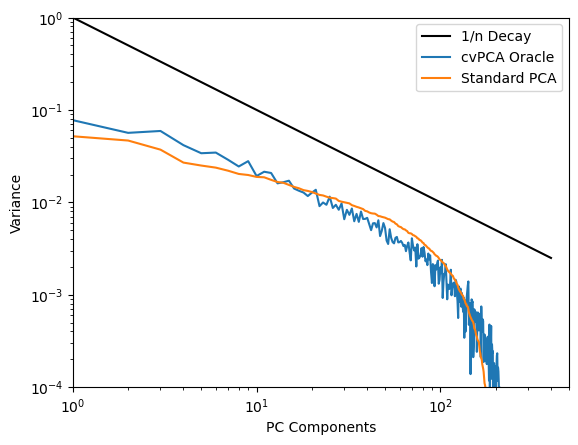

In [94]:
x=np.linspace(1,400,400)
y=f(x)
plt.figure()
plt.plot(x, y,color = 'black', label = '1/n Decay')
plt.plot(np.arange(1, len(cvPCA_layer1_espectrum) + 1),cvPCA_layer1_espectrum/np.sum(cvPCA_layer1_espectrum), label = 'cvPCA Oracle')
plt.plot(np.arange(1, len(layer1_espectrum) + 1),layer1_espectrum/np.sum(layer1_espectrum), label = 'Standard PCA')
plt.xlabel('PC Components')
plt.ylabel('Variance')
plt.xscale('log')
plt.xlim(1,500)
plt.ylim(10e-5,1)
plt.yscale('log')
plt.legend()
plt.show()

## Layer 2/3 Analysis

### Define data frames for each trial in layer 2/3

In [25]:
L23_Trial1_Oracle = pd.read_csv("C:/Users/riley/data/L23_Trial1_Oracle.csv", header= None)
L23_Trial1_Oracle = L23_Trial1_Oracle.to_numpy()
L23_Trial1_Oracle = np.transpose(L23_Trial1_Oracle)

In [26]:
L23_Trial2_Oracle = pd.read_csv("C:/Users/riley/data/L23_Trial2_Oracle.csv", header= None)
L23_Trial2_Oracle = L23_Trial2_Oracle.to_numpy()
L23_Trial2_Oracle = np.transpose(L23_Trial2_Oracle)

In [27]:
L23_Trial3_Oracle = pd.read_csv("C:/Users/riley/data/L23_Trial3_Oracle.csv", header= None)
L23_Trial3_Oracle = L23_Trial3_Oracle.to_numpy()
L23_Trial3_Oracle = np.transpose(L23_Trial3_Oracle)

In [28]:
L23_Trial4_Oracle = pd.read_csv("C:/Users/riley/data/L23_Trial4_Oracle.csv", header= None)
L23_Trial4_Oracle = L23_Trial4_Oracle.to_numpy()
L23_Trial4_Oracle = np.transpose(L23_Trial4_Oracle)

In [29]:
L23_Trial5_Oracle = pd.read_csv("C:/Users/riley/data/L23_Trial5_Oracle.csv", header= None)
L23_Trial5_Oracle = L23_Trial5_Oracle.to_numpy()
L23_Trial5_Oracle = np.transpose(L23_Trial5_Oracle)

In [30]:
L23_Trial6_Oracle = pd.read_csv("C:/Users/riley/data/L23_Trial6_Oracle.csv", header= None)
L23_Trial6_Oracle = L23_Trial6_Oracle.to_numpy()
L23_Trial6_Oracle = np.transpose(L23_Trial6_Oracle)

In [31]:
L23_Trial7_Oracle = pd.read_csv("C:/Users/riley/data/L23_Trial7_Oracle.csv", header= None)
L23_Trial7_Oracle = L23_Trial7_Oracle.to_numpy()
L23_Trial7_Oracle = np.transpose(L23_Trial7_Oracle)

In [33]:
L23_Trial8_Oracle = pd.read_csv("C:/Users/riley/data/L23_Trial8_Oracle.csv", header= None)
L23_Trial8_Oracle = L23_Trial8_Oracle.to_numpy()
L23_Trial8_Oracle = np.transpose(L23_Trial8_Oracle)

In [34]:
L23_Trial9_Oracle = pd.read_csv("C:/Users/riley/data/L23_Trial9_Oracle.csv", header= None)
L23_Trial9_Oracle = L23_Trial9_Oracle.to_numpy()
L23_Trial9_Oracle = np.transpose(L23_Trial9_Oracle)

In [35]:
L23_Trial10_Oracle = pd.read_csv("C:/Users/riley/data/L23_Trial10_Oracle.csv", header= None)
L23_Trial10_Oracle = L23_Trial10_Oracle.to_numpy()
L23_Trial10_Oracle = np.transpose(L23_Trial10_Oracle)

In [36]:
L23_AvgResp_Oracle = pd.read_csv("C:/Users/riley/data/L23_AvgResp_Oracle.csv", header= None)
L23_AvgResp_Oracle = L23_AvgResp_Oracle.to_numpy()
L23_AvgResp_Oracle = np.transpose(L23_AvgResp_Oracle)

### Run cvPCA function on Oracle Stimuli

In [38]:
cvPCA_layer23_espectra1 = cvpca(L23_Trial1_Oracle,L23_Trial2_Oracle,L23_Trial3_Oracle,L23_Trial4_Oracle,L23_Trial5_Oracle,L23_Trial6_Oracle,L23_Trial7_Oracle,L23_Trial8_Oracle,L23_Trial9_Oracle,L23_Trial10_Oracle,0,30)
cvPCA_layer23_espectra1 = np.array(cvPCA_layer23_espectra1)
cvPCA_layer23_espectrum1 = cvPCA_layer23_espectra1.mean(axis=0)

In [39]:
cvPCA_layer23_espectra2 = cvpca(L23_Trial1_Oracle,L23_Trial2_Oracle,L23_Trial3_Oracle,L23_Trial4_Oracle,L23_Trial5_Oracle,L23_Trial6_Oracle,L23_Trial7_Oracle,L23_Trial8_Oracle,L23_Trial9_Oracle,L23_Trial10_Oracle,30,60)
cvPCA_layer23_espectra2 = np.array(cvPCA_layer23_espectra2)
cvPCA_layer23_espectrum2 = cvPCA_layer23_espectra2.mean(axis=0)

In [40]:
cvPCA_layer23_espectra3 = cvpca(L23_Trial1_Oracle,L23_Trial2_Oracle,L23_Trial3_Oracle,L23_Trial4_Oracle,L23_Trial5_Oracle,L23_Trial6_Oracle,L23_Trial7_Oracle,L23_Trial8_Oracle,L23_Trial9_Oracle,L23_Trial10_Oracle,60,90)
cvPCA_layer23_espectra3 = np.array(cvPCA_layer23_espectra3)
cvPCA_layer23_espectrum3 = cvPCA_layer23_espectra3.mean(axis=0)

In [41]:
cvPCA_layer23_espectrum = (cvPCA_layer23_espectrum1+cvPCA_layer23_espectrum2+cvPCA_layer23_espectrum2)/3

In [95]:
np.savetxt('cvPCA_layer23_espectrum', cvPCA_layer23_espectrum, delimiter = ',')

### Run standard PCA

In [42]:
layer23_evectors, layer23_espectrum = pca(L23_AvgResp_Oracle)

In [96]:
np.savetxt('layer23_espectrum', layer23_espectrum, delimiter = ',')

### Plot Comparison

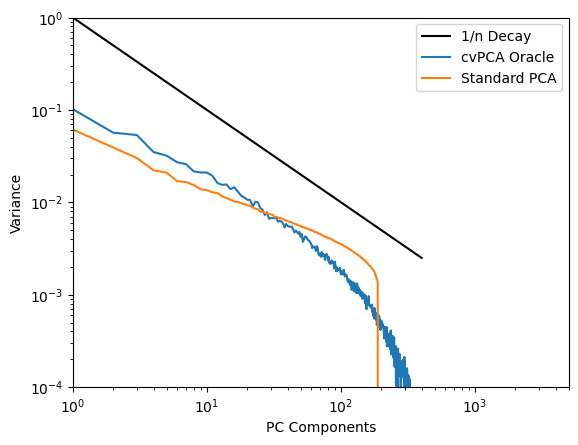

In [43]:
x=np.linspace(1,400,400)
y=f(x)
plt.figure()
plt.plot(x, y,color = 'black', label = '1/n Decay')
plt.plot(np.arange(1, len(cvPCA_layer23_espectrum) + 1),cvPCA_layer23_espectrum/np.sum(cvPCA_layer23_espectrum), label = 'cvPCA Oracle')
plt.plot(np.arange(1, len(layer23_espectrum) + 1),layer23_espectrum/np.sum(layer23_espectrum), label = 'Standard PCA')
plt.xlabel('PC Components')
plt.ylabel('Variance')
plt.xscale('log')
plt.xlim(1,5000)
plt.ylim(10e-5,1)
plt.yscale('log')
plt.legend()
plt.show()

## Layer 4 Analysis

### Define data frames for each trial in layer 4

In [44]:
L4_Trial1_Oracle = pd.read_csv("C:/Users/riley/data/L4_Trial1_Oracle.csv", header= None)
L4_Trial1_Oracle = L4_Trial1_Oracle.to_numpy()
L4_Trial1_Oracle = np.transpose(L4_Trial1_Oracle)

In [45]:
L4_Trial2_Oracle = pd.read_csv("C:/Users/riley/data/L4_Trial2_Oracle.csv", header= None)
L4_Trial2_Oracle = L4_Trial2_Oracle.to_numpy()
L4_Trial2_Oracle = np.transpose(L4_Trial2_Oracle)

In [46]:
L4_Trial3_Oracle = pd.read_csv("C:/Users/riley/data/L4_Trial3_Oracle.csv", header= None)
L4_Trial3_Oracle = L4_Trial3_Oracle.to_numpy()
L4_Trial3_Oracle = np.transpose(L4_Trial3_Oracle)

In [47]:
L4_Trial4_Oracle = pd.read_csv("C:/Users/riley/data/L4_Trial4_Oracle.csv", header= None)
L4_Trial4_Oracle = L4_Trial4_Oracle.to_numpy()
L4_Trial4_Oracle = np.transpose(L4_Trial4_Oracle)

In [48]:
L4_Trial5_Oracle = pd.read_csv("C:/Users/riley/data/L4_Trial5_Oracle.csv", header= None)
L4_Trial5_Oracle = L4_Trial5_Oracle.to_numpy()
L4_Trial5_Oracle = np.transpose(L4_Trial5_Oracle)

In [49]:
L4_Trial6_Oracle = pd.read_csv("C:/Users/riley/data/L4_Trial6_Oracle.csv", header= None)
L4_Trial6_Oracle = L4_Trial6_Oracle.to_numpy()
L4_Trial6_Oracle = np.transpose(L4_Trial6_Oracle)

In [50]:
L4_Trial7_Oracle = pd.read_csv("C:/Users/riley/data/L4_Trial7_Oracle.csv", header= None)
L4_Trial7_Oracle = L4_Trial7_Oracle.to_numpy()
L4_Trial7_Oracle = np.transpose(L4_Trial7_Oracle)

In [51]:
L4_Trial8_Oracle = pd.read_csv("C:/Users/riley/data/L4_Trial8_Oracle.csv", header= None)
L4_Trial8_Oracle = L4_Trial8_Oracle.to_numpy()
L4_Trial8_Oracle = np.transpose(L4_Trial8_Oracle)

In [52]:
L4_Trial9_Oracle = pd.read_csv("C:/Users/riley/data/L4_Trial9_Oracle.csv", header= None)
L4_Trial9_Oracle = L4_Trial9_Oracle.to_numpy()
L4_Trial9_Oracle = np.transpose(L4_Trial9_Oracle)

In [53]:
L4_Trial10_Oracle = pd.read_csv("C:/Users/riley/data/L4_Trial10_Oracle.csv", header= None)
L4_Trial10_Oracle = L4_Trial10_Oracle.to_numpy()
L4_Trial10_Oracle = np.transpose(L4_Trial10_Oracle)

In [54]:
L4_AvgResp_Oracle = pd.read_csv("C:/Users/riley/data/L4_AvgResp_Oracle.csv", header= None)
L4_AvgResp_Oracle = L4_AvgResp_Oracle.to_numpy()
L4_AvgResp_Oracle = np.transpose(L4_AvgResp_Oracle)

### Run cvPCA function on train/test combinations and average into final eigenspectrum

In [56]:
cvPCA_layer4_espectra = cvpca(L4_Trial1_Oracle,L4_Trial2_Oracle,L4_Trial3_Oracle,L4_Trial4_Oracle,L4_Trial5_Oracle,L4_Trial6_Oracle,L4_Trial7_Oracle,L4_Trial8_Oracle,L4_Trial9_Oracle,L4_Trial10_Oracle)
cvPCA_layer4_espectra = np.array(cvPCA_layer4_espectra)
cvPCA_layer4_espectrum = cvPCA_layer4_espectra.mean(axis=0)

In [97]:
np.savetxt('cvPCA_layer4_espectrum', cvPCA_layer4_espectrum, delimiter = ',')

### Run standard PCA to compare results

In [57]:
layer4_evectors, layer4_espectrum = pca(L4_AvgResp_Oracle)

In [98]:
np.savetxt('layer4_espectrum', layer4_espectrum, delimiter = ',')

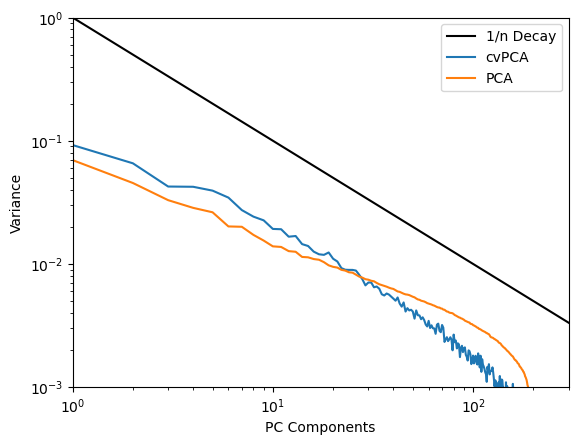

In [58]:
x=np.linspace(1,400,400)
y=f(x)
plt.figure()
plt.plot(x, y,color = 'black', label = '1/n Decay')
plt.plot(np.arange(1, len(cvPCA_layer4_espectrum) + 1),cvPCA_layer4_espectrum/np.sum(cvPCA_layer4_espectrum), label = 'cvPCA')
plt.plot(np.arange(1, len(layer4_espectrum) + 1),layer4_espectrum/np.sum(layer4_espectrum), label = 'PCA')
plt.xlabel('PC Components')
plt.ylabel('Variance')
plt.xscale('log')
plt.xlim(1,300)
plt.ylim(10e-4,1)
plt.yscale('log')
plt.legend()
plt.show()

## Layer 5 Analysis

### Define data frames for each trial in layer 5

In [59]:
L5_Trial1_Oracle = pd.read_csv("C:/Users/riley/data/L5_Trial1_Oracle.csv", header= None)
L5_Trial1_Oracle = L5_Trial1_Oracle.to_numpy()
L5_Trial1_Oracle = np.transpose(L5_Trial1_Oracle)

In [60]:
L5_Trial2_Oracle = pd.read_csv("C:/Users/riley/data/L5_Trial2_Oracle.csv", header= None)
L5_Trial2_Oracle = L5_Trial2_Oracle.to_numpy()
L5_Trial2_Oracle = np.transpose(L5_Trial2_Oracle)

In [61]:
L5_Trial3_Oracle = pd.read_csv("C:/Users/riley/data/L5_Trial3_Oracle.csv", header= None)
L5_Trial3_Oracle = L5_Trial3_Oracle.to_numpy()
L5_Trial3_Oracle = np.transpose(L5_Trial3_Oracle)

In [62]:
L5_Trial4_Oracle = pd.read_csv("C:/Users/riley/data/L5_Trial4_Oracle.csv", header= None)
L5_Trial4_Oracle = L5_Trial4_Oracle.to_numpy()
L5_Trial4_Oracle = np.transpose(L5_Trial4_Oracle)

In [63]:
L5_Trial5_Oracle = pd.read_csv("C:/Users/riley/data/L5_Trial5_Oracle.csv", header= None)
L5_Trial5_Oracle = L5_Trial5_Oracle.to_numpy()
L5_Trial5_Oracle = np.transpose(L5_Trial5_Oracle)

In [64]:
L5_Trial6_Oracle = pd.read_csv("C:/Users/riley/data/L5_Trial6_Oracle.csv", header= None)
L5_Trial6_Oracle = L5_Trial6_Oracle.to_numpy()
L5_Trial6_Oracle = np.transpose(L5_Trial6_Oracle)

In [65]:
L5_Trial7_Oracle = pd.read_csv("C:/Users/riley/data/L5_Trial7_Oracle.csv", header= None)
L5_Trial7_Oracle = L5_Trial7_Oracle.to_numpy()
L5_Trial7_Oracle = np.transpose(L5_Trial7_Oracle)

In [66]:
L5_Trial8_Oracle = pd.read_csv("C:/Users/riley/data/L5_Trial8_Oracle.csv", header= None)
L5_Trial8_Oracle = L5_Trial8_Oracle.to_numpy()
L5_Trial8_Oracle = np.transpose(L5_Trial8_Oracle)

In [67]:
L5_Trial9_Oracle = pd.read_csv("C:/Users/riley/data/L5_Trial9_Oracle.csv", header= None)
L5_Trial9_Oracle = L5_Trial9_Oracle.to_numpy()
L5_Trial9_Oracle = np.transpose(L5_Trial9_Oracle)

In [68]:
L5_Trial10_Oracle = pd.read_csv("C:/Users/riley/data/L5_Trial10_Oracle.csv", header= None)
L5_Trial10_Oracle = L5_Trial10_Oracle.to_numpy()
L5_Trial10_Oracle = np.transpose(L5_Trial10_Oracle)

In [69]:
L5_AvgResp_Oracle = pd.read_csv("C:/Users/riley/data/L5_AvgResp_Oracle.csv", header= None)
L5_AvgResp_Oracle = L5_AvgResp_Oracle.to_numpy()
L5_AvgResp_Oracle = np.transpose(L5_AvgResp_Oracle)

### Run cvPCA function on subsets of train/test combinations and average into final eigenspectrum

In [71]:
cvPCA_layer5_espectra1 = cvpca(L5_Trial1_Oracle,L5_Trial2_Oracle,L5_Trial3_Oracle,L5_Trial4_Oracle,L5_Trial5_Oracle,L5_Trial6_Oracle,L5_Trial7_Oracle,L5_Trial8_Oracle,L5_Trial9_Oracle,L5_Trial10_Oracle,0,30)
cvPCA_layer5_espectra1 = np.array(cvPCA_layer5_espectra1)
cvPCA_layer5_espectrum1 = cvPCA_layer5_espectra1.mean(axis=0)

In [73]:
cvPCA_layer5_espectra2 = cvpca(L5_Trial1_Oracle,L5_Trial2_Oracle,L5_Trial3_Oracle,L5_Trial4_Oracle,L5_Trial5_Oracle,L5_Trial6_Oracle,L5_Trial7_Oracle,L5_Trial8_Oracle,L5_Trial9_Oracle,L5_Trial10_Oracle,30,60)
cvPCA_layer5_espectra2 = np.array(cvPCA_layer5_espectra2)
cvPCA_layer5_espectrum2 = cvPCA_layer5_espectra2.mean(axis=0)

In [74]:
cvPCA_layer5_espectra3 = cvpca(L5_Trial1_Oracle,L5_Trial2_Oracle,L5_Trial3_Oracle,L5_Trial4_Oracle,L5_Trial5_Oracle,L5_Trial6_Oracle,L5_Trial7_Oracle,L5_Trial8_Oracle,L5_Trial9_Oracle,L5_Trial10_Oracle,60,90)
cvPCA_layer5_espectra3 = np.array(cvPCA_layer5_espectra3)
cvPCA_layer5_espectrum3 = cvPCA_layer5_espectra3.mean(axis=0)

In [75]:
cvPCA_layer5_espectrum = (cvPCA_layer5_espectrum1+cvPCA_layer5_espectrum2+cvPCA_layer5_espectrum3)/3

In [99]:
np.savetxt('cvPCA_layer5_espectrum', cvPCA_layer5_espectrum, delimiter = ',')

### Run standard PCA to compare results

In [76]:
layer5_evectors, layer5_espectrum = pca(L5_AvgResp_Oracle)

In [100]:
np.savetxt('layer5_espectrum', layer5_espectrum, delimiter = ',')

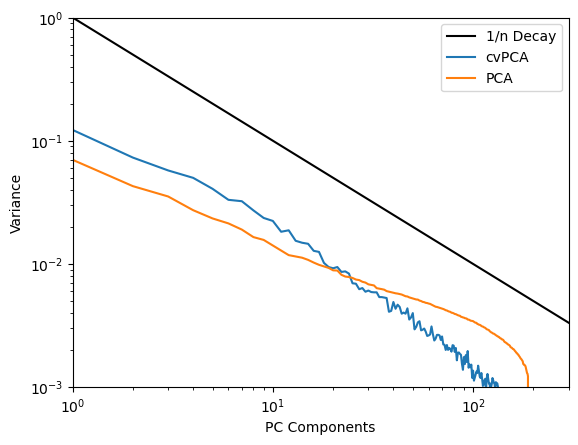

In [77]:
x=np.linspace(1,400,400)
y=f(x)
plt.figure()
plt.plot(x, y,color = 'black', label = '1/n Decay')
plt.plot(np.arange(1, len(cvPCA_layer5_espectrum) + 1),cvPCA_layer5_espectrum/np.sum(cvPCA_layer5_espectrum), label = 'cvPCA')
plt.plot(np.arange(1, len(layer5_espectrum) + 1),layer5_espectrum/np.sum(layer5_espectrum), label = 'PCA')
plt.xlabel('PC Components')
plt.ylabel('Variance')
plt.xscale('log')
plt.xlim(1,300)
plt.ylim(10e-4,1)
plt.yscale('log')
plt.legend()
plt.show()

## Layer 6 Analysis

### Define data frames for each trial in layer 6

In [78]:
L6_Trial1_Oracle = pd.read_csv("C:/Users/riley/data/L6_Trial1_Oracle.csv", header= None)
L6_Trial1_Oracle = L6_Trial1_Oracle.to_numpy()
L6_Trial1_Oracle = np.transpose(L6_Trial1_Oracle)

In [79]:
L6_Trial2_Oracle = pd.read_csv("C:/Users/riley/data/L6_Trial2_Oracle.csv", header= None)
L6_Trial2_Oracle = L6_Trial2_Oracle.to_numpy()
L6_Trial2_Oracle = np.transpose(L6_Trial2_Oracle)

In [80]:
L6_Trial3_Oracle = pd.read_csv("C:/Users/riley/data/L6_Trial3_Oracle.csv", header= None)
L6_Trial3_Oracle = L6_Trial3_Oracle.to_numpy()
L6_Trial3_Oracle = np.transpose(L6_Trial3_Oracle)

In [81]:
L6_Trial4_Oracle = pd.read_csv("C:/Users/riley/data/L6_Trial4_Oracle.csv", header= None)
L6_Trial4_Oracle = L6_Trial4_Oracle.to_numpy()
L6_Trial4_Oracle = np.transpose(L6_Trial4_Oracle)

In [82]:
L6_Trial5_Oracle = pd.read_csv("C:/Users/riley/data/L6_Trial5_Oracle.csv", header= None)
L6_Trial5_Oracle = L6_Trial5_Oracle.to_numpy()
L6_Trial5_Oracle = np.transpose(L6_Trial5_Oracle)

In [83]:
L6_Trial6_Oracle = pd.read_csv("C:/Users/riley/data/L6_Trial6_Oracle.csv", header= None)
L6_Trial6_Oracle = L6_Trial6_Oracle.to_numpy()
L6_Trial6_Oracle = np.transpose(L6_Trial6_Oracle)

In [84]:
L6_Trial7_Oracle = pd.read_csv("C:/Users/riley/data/L6_Trial7_Oracle.csv", header= None)
L6_Trial7_Oracle = L6_Trial7_Oracle.to_numpy()
L6_Trial7_Oracle = np.transpose(L6_Trial7_Oracle)

In [85]:
L6_Trial8_Oracle = pd.read_csv("C:/Users/riley/data/L6_Trial8_Oracle.csv", header= None)
L6_Trial8_Oracle = L6_Trial8_Oracle.to_numpy()
L6_Trial8_Oracle = np.transpose(L6_Trial8_Oracle)

In [86]:
L6_Trial9_Oracle = pd.read_csv("C:/Users/riley/data/L6_Trial9_Oracle.csv", header= None)
L6_Trial9_Oracle = L6_Trial9_Oracle.to_numpy()
L6_Trial9_Oracle = np.transpose(L6_Trial9_Oracle)

In [87]:
L6_Trial10_Oracle = pd.read_csv("C:/Users/riley/data/L6_Trial10_Oracle.csv", header= None)
L6_Trial10_Oracle = L6_Trial10_Oracle.to_numpy()
L6_Trial10_Oracle = np.transpose(L6_Trial10_Oracle)

In [88]:
L6_AvgResp_Oracle = pd.read_csv("C:/Users/riley/data/L6_AvgResp_Oracle.csv", header= None)
L6_AvgResp_Oracle = L6_AvgResp_Oracle.to_numpy()
L6_AvgResp_Oracle = np.transpose(L6_AvgResp_Oracle)

### Run cvPCA function on train/test combinations and average into final eigenspectrum

In [89]:
cvPCA_layer6_espectra = cvpca(L6_Trial1_Oracle,L6_Trial2_Oracle,L6_Trial3_Oracle,L6_Trial4_Oracle,L6_Trial5_Oracle,L6_Trial6_Oracle,L6_Trial7_Oracle,L6_Trial8_Oracle,L6_Trial9_Oracle,L6_Trial10_Oracle)
cvPCA_layer6_espectra = np.array(cvPCA_layer6_espectra)
cvPCA_layer6_espectrum = cvPCA_layer6_espectra.mean(axis=0)

In [101]:
np.savetxt('cvPCA_layer6_espectrum', cvPCA_layer6_espectrum, delimiter = ',')

### Run standard PCA to compare results

In [90]:
layer6_evectors, layer6_espectrum = pca(L6_AvgResp_Oracle)

In [102]:
np.savetxt('layer6_espectrum', layer6_espectrum, delimiter = ',')

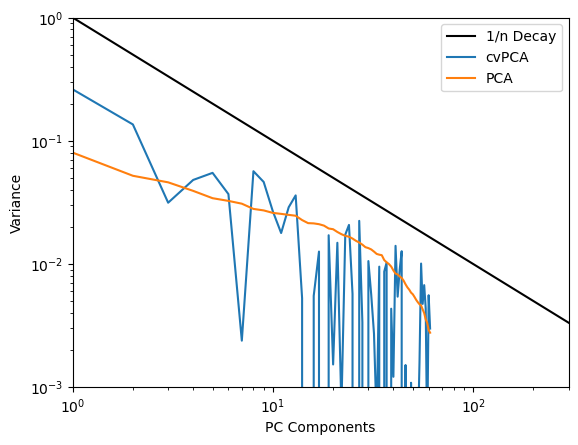

In [91]:
x=np.linspace(1,400,400)
y=f(x)
plt.figure()
plt.plot(x, y,color = 'black', label = '1/n Decay')
plt.plot(np.arange(1, len(cvPCA_layer6_espectrum) + 1),cvPCA_layer6_espectrum/np.sum(cvPCA_layer6_espectrum), label = 'cvPCA')
plt.plot(np.arange(1, len(layer6_espectrum) + 1),layer6_espectrum/np.sum(layer6_espectrum), label = 'PCA')
plt.xlabel('PC Components')
plt.ylabel('Variance')
plt.xscale('log')
plt.xlim(1,300)
plt.ylim(10e-4,1)
plt.yscale('log')
plt.legend()
plt.show()

## Plot combined eigenspectra to compare differences across layers

### cvPCA

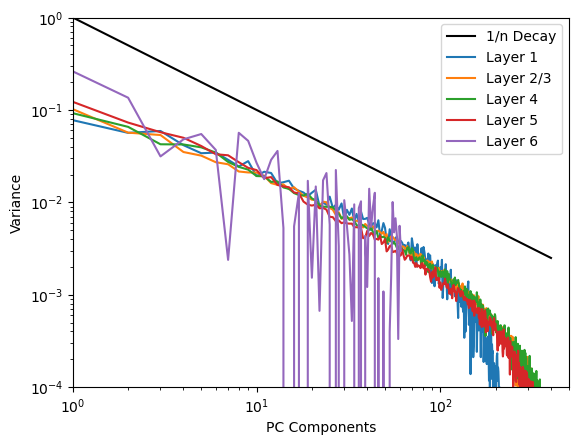

In [114]:
plot_eigenspectrum_combined_layers(cvPCA_layer1_espectrum,cvPCA_layer23_espectrum,cvPCA_layer4_espectrum,cvPCA_layer5_espectrum,cvPCA_layer6_espectrum)

## Standard PCA

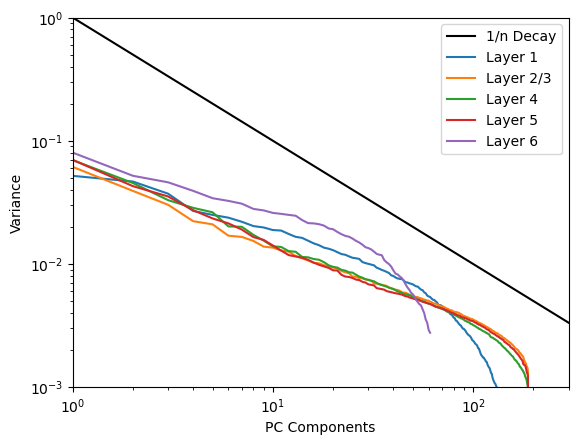

In [106]:
plot_eigenspectrum_combined_layers(layer1_espectrum, layer23_espectrum, layer4_espectrum, layer5_espectrum, layer6_espectrum)